In [2]:
import pandas as pd

df = pd.read_csv('businesses.csv')

In [8]:
import folium
from folium.plugins import HeatMap


df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)



heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
heatmap =  folium.Map(location=[42.333943, -71.130000],zoom_start = 13)

HeatMap(heat_data).add_to(heatmap)
heatmap

In [9]:
df = df.replace({'NAICS_2017_2digit_desc':'62'},'Healthcare and Social Assistance') # Fixed labeling
df.head()

,...1,latitude,longitude,business_name,street_address,zip,NAICS_2017_6digit_code,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet
0,1,42.349398,-71.154065,zisis convenience store,375 Washington St,2135,452319,All Other General Merchandise Stores,45,Retail Trade,1.0,1 to 9,Brighton
1,2,42.350387,-71.165135,ziggy's,583 Washington St,2135,0,NaN,99,Undefined,0.0,Not Available,Brighton
2,3,42.349219,-71.151769,zen zone acupuncture & spa,319 Washington St,2135,621399,Offices of All Other Miscellaneous Health Prac...,62,Healthcare and Social Assistance,2.0,1 to 9,Brighton
3,4,42.349465,-71.153117,yes nails & spa inc,416 Market St,2135,812113,Nail Salons,81,Other Services,3.0,1 to 9,Brighton
4,5,42.349453,-71.151543,xfinity,12 Wirt St,2135,515210,Cable and Other Subscription Programming,51,Information,13.0,10 to 24,Brighton


<AxesSubplot:>

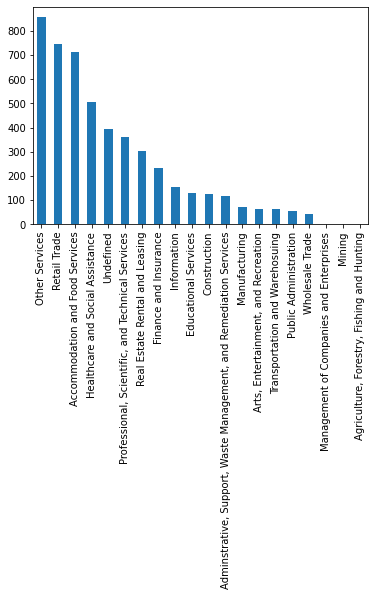

In [15]:
df["NAICS_2017_2digit_desc"].value_counts().plot(kind="bar")

In [11]:
from sklearn import cluster
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

rawClusterMap =  folium.Map(location=[42.333943, -71.130000],zoom_start = 13)
x = np.arange(20)
ys = [i + x + (i*x)**2 for i in range(20)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


df["NAICS_2017_2digit_desc"] = df["NAICS_2017_2digit_desc"].astype('category')
df["Business_Type"] = df["NAICS_2017_2digit_desc"].cat.codes
df["Business_Type"].head()

for lat,lng,clusters in zip(df['latitude'], df['longitude'],  df['Business_Type']):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        
        color=rainbow[clusters-1],
        fill=True,
        fill_color=rainbow[clusters-1],
        fill_opacity=0.9).add_to(rawClusterMap)

rawClusterMap
